# **Problem Statement:**

Build a machine learning model that can accurately classify the species of an iris flower based on its sepal and petal measurements.

# **Data Dictionary:**
**The dataset consists of 150 samples, each describing an individual iris flower using:**

Sepal length

Sepal width

Petal length

Petal width



**Target (Class Labels):**

There are three species (classes) of Iris flowers:

1. Iris setosa

2. Iris versicolor

3. Iris virginica

Each class has 50 samples, making the dataset balanced.

Import **Librraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Uploading Dataset**

In [ ]:
df=pd.read_csv("IRIS.csv")

**Display First 5 Records**

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Display Last 5 Records**

In [ ]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


**Display Number of Rows**

In [ ]:
df.shape

(150, 5)

**Display All Datatypes**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**5 Points Summery data**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


**To Check Null values**

In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


**Check For All columns**

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of
# a number.

# we use np.isreal a numpy function which checks each column for each row and returns a bool array,
# where True if input element is real.
# applymap is pandas dataframe function that applies the np.isreal function columnwise
# Following line selects those rows which have some non-numeric value in any of the columns hence the  ~ symbol

df[df.applymap(np.isreal).all(1)]

<ipython-input-11-3714c14e161e>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[df.applymap(np.isreal).all(1)]


,sepal_length,sepal_width,petal_length,petal_width,species


In [ ]:
#Frequency Tables (for categorical variables)
# Example for the 'species' variable (assuming it's categorical):

df["species"].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
# Let us look at the target column which is 'species' to understand how the data is distributed amongst the various values
# Most are not diabetic. The ratio is almost 1:2 in favor or class 0.  The model's ability to predict class 0 will
# be better than predicting class 1.
df.groupby(["species"]).count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


# **Univariate Analysis**

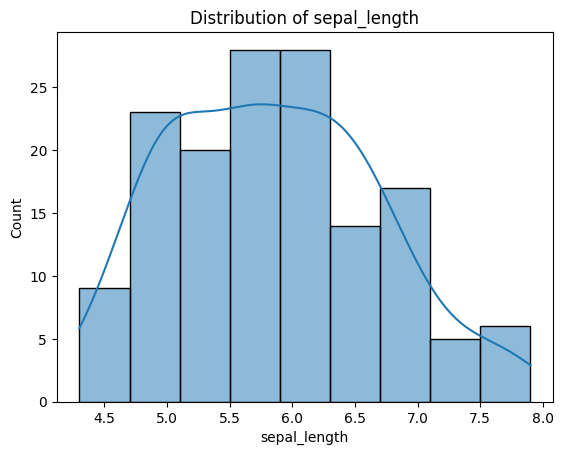

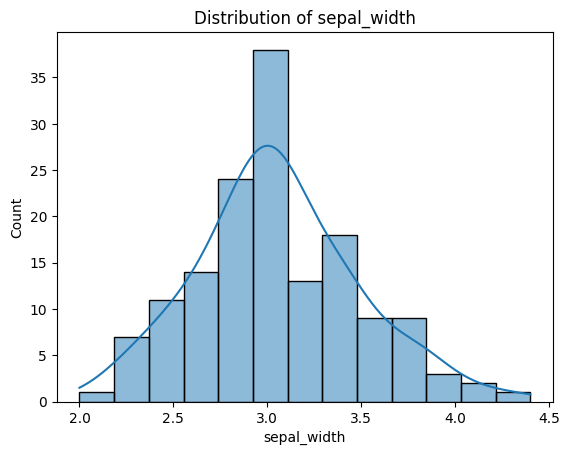

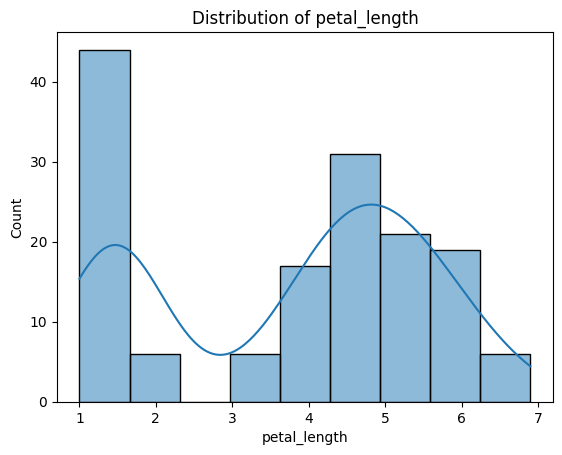

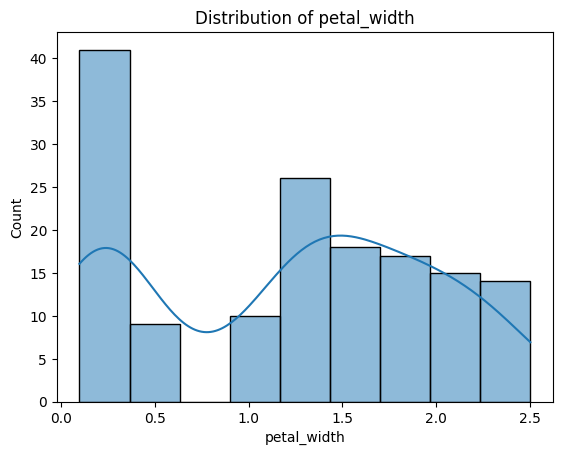

In [ ]:
#Histograms: (Visualize the distribution of numerical variables)
for col in df.columns:
     if df[col].dtype != "object": # Exclude non-numeric columns if any
         plt.figure()
         sns.histplot(df[col],kde=True) # kde adds a kernel density estimate curve
         plt.title(f'Distribution of {col}')
         plt.show()

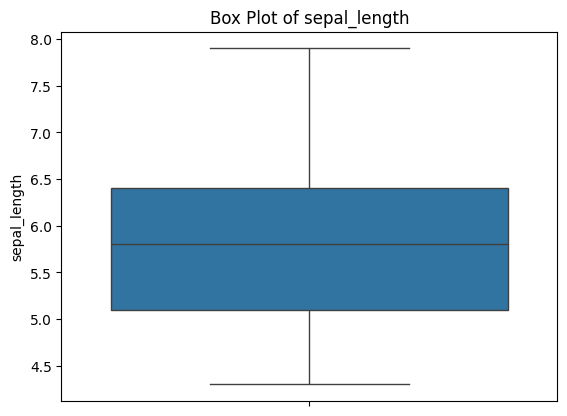

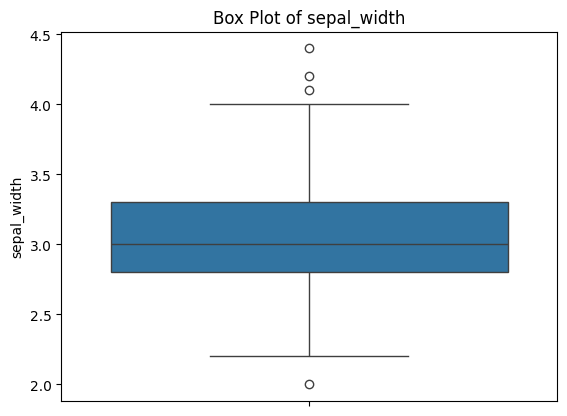

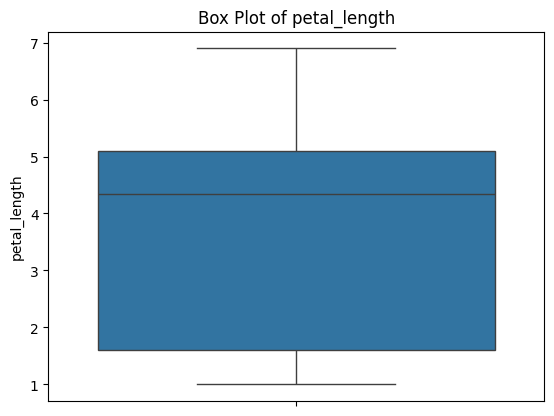

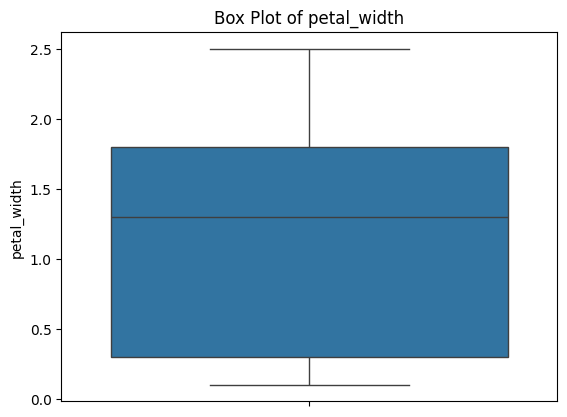

In [ ]:
#Box Plots: (Identify potential outliers and distribution skewness)
for col in df.columns:
    if df[col].dtype != 'object':
        plt.figure()
        sns.boxplot(y=df[col])
        plt.title(f'Box Plot of {col}')
        plt.show()

In [ ]:
df.groupby(["species"]).count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


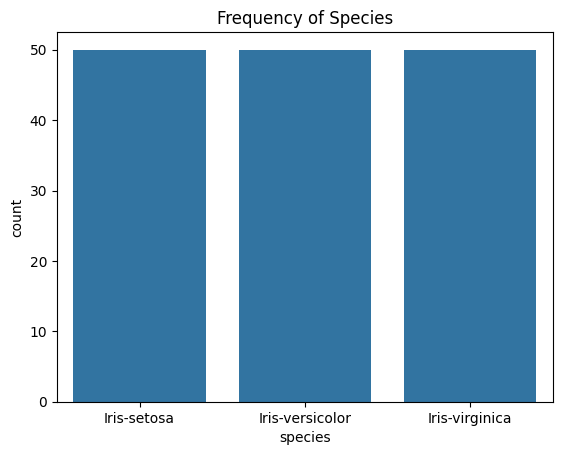

In [ ]:
#Bar Charts (for categorical variables):
plt.figure()
sns.countplot(x='species',data=df)
plt.title('Frequency of Species')
plt.show()

# **Bivariate Analysis**

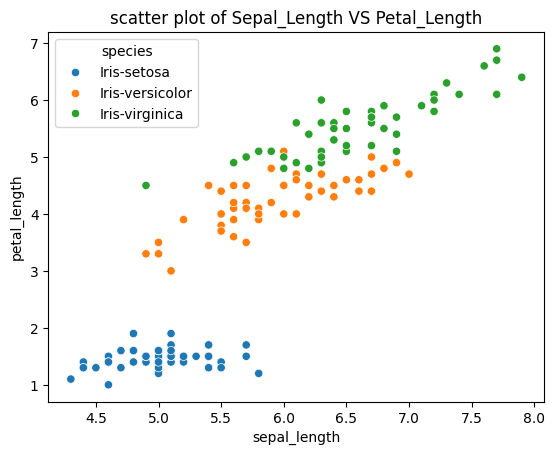

In [ ]:
#Scatter Plots: Visualize the relationship between two numerical variables
sns.scatterplot(x='sepal_length',y='petal_length',data=df,hue='species')
plt.title('scatter plot of Sepal_Length VS Petal_Length')
plt.show()

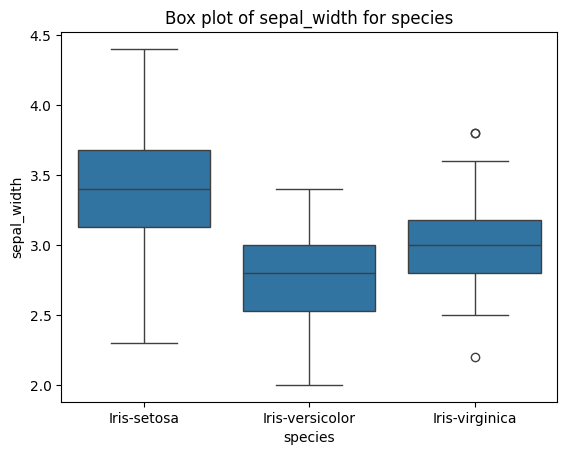

In [ ]:
sns.boxplot(x='species',y='sepal_width',data=df)
plt.title('Box plot of sepal_width for species')
plt.show()

In [ ]:
pd.crosstab(df['petal_width'],df['species'])

species,Iris-setosa,Iris-versicolor,Iris-virginica
petal_width,,,
0.1,6,0,0
0.2,28,0,0
0.3,7,0,0
0.4,7,0,0
0.5,1,0,0
0.6,1,0,0
1.0,0,7,0
1.1,0,3,0
1.2,0,5,0


# **Multivariate Analysis**

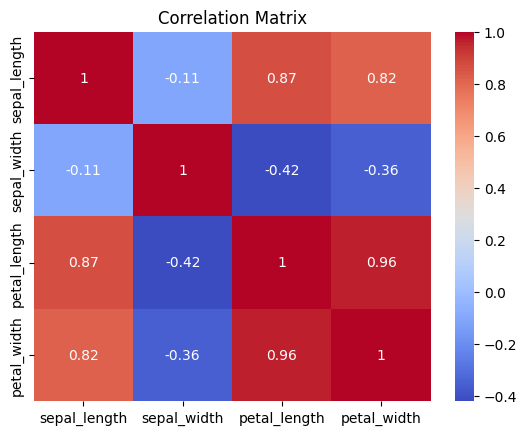

In [ ]:
#Heatmap (Correlation Matrix):
# Exclude non-numeric columns (like 'species') before calculating correlation
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

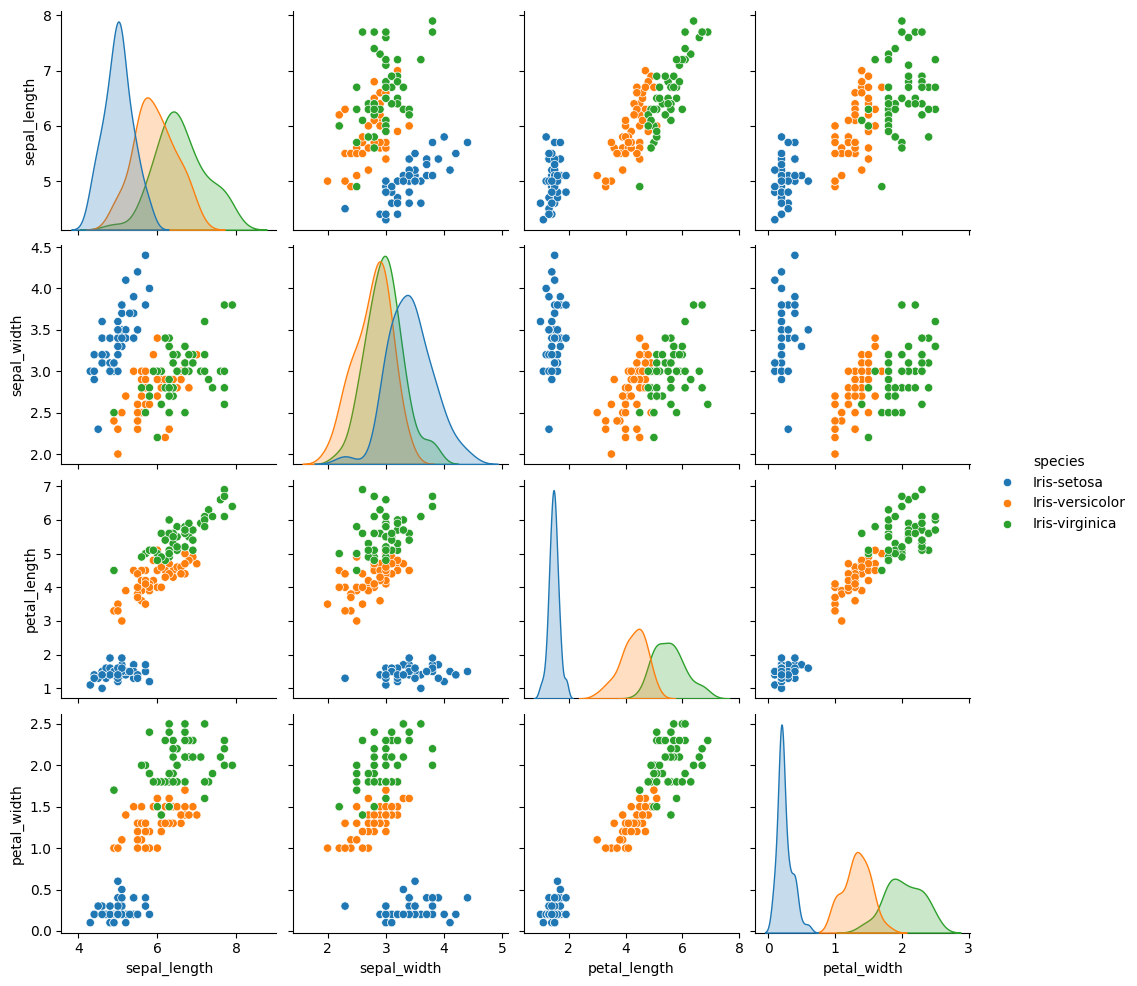

In [ ]:
#Pair Plot: Creates scatter plots for all pairs of numerical variables in the dataset, along with histograms for individual variables.
sns.pairplot(df,hue='species') # 'species' is used for color-codin
plt.show()

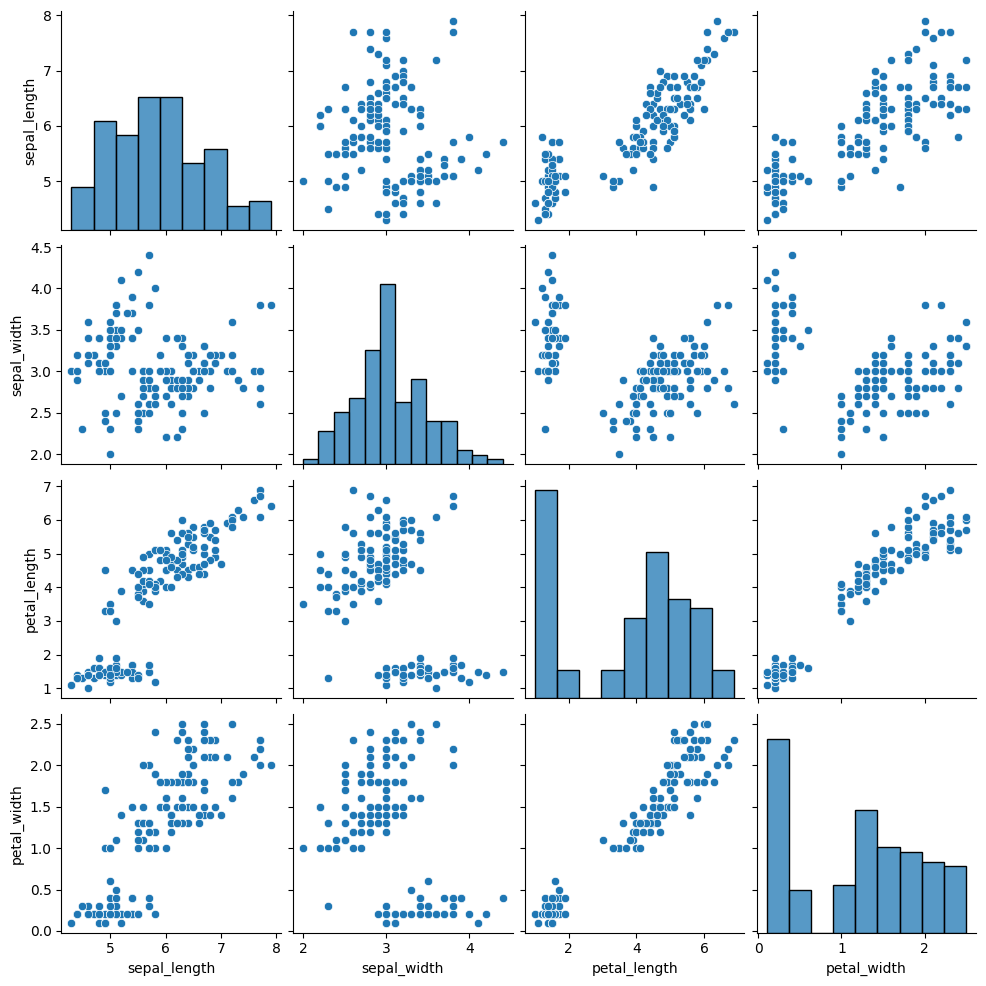

In [ ]:
# Pairplot using sns
sns.pairplot(df)

# **Model Building**

In [ ]:
#Observations:
#data for all the attributes are skewed, especially for the variable "test"

#The mean for test is 80(rounded) while the median is 30.5 which clearly indicates an extreme long tail on the right


In [ ]:
array=df.values
x=df.iloc[:,0:4] # Select the first 4 columns as features (sepal_length, sepal_width, petal_length, petal_width)
y=df.iloc[:,4]   # Select the 5th column (index 4) as the target variable (species)
#X = array[:,0:8] # select all rows and first 5 columns which are the attributes
#Y = array[:,8]   # select all rows and the 5th column which is the classification.
test_size=0.30 # taking 70:30 training and test set
seed=1  # Random numbmer seeding for reapeatability of the code
from sklearn.model_selection import train_test_split # Import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=test_size,random_state=seed)

In [ ]:
#  fit the model on 30%
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
# Get the feature names from X_train
t=x_train.columns

coef_df=pd.DataFrame(model.coef_,columns=t)
coef_df['intercept']=model.intercept_[0]
print(coef_df)

   sepal_length  sepal_width  petal_length  petal_width  intercept
0     -0.436925     0.752835     -2.242732    -0.943328   9.226053
1      0.583157    -0.534156     -0.132140    -0.789642   9.226053
2     -0.146233    -0.218679      2.374873     1.732970   9.226053


In [ ]:
from sklearn import metrics # Import the metrics module
model_score=model.score(x_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_predict))

0.9777777777777777
[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


**Accuracy Evaluation**

High accuracy 97.7% suggests the model learned well from the data.

Given the simplicity and separability of the Iris dataset, most classifiers perform very well.